# Annual Percentage Yield (APY)

Rates
- https://www.gecu.com/rates
- https://www.wellsfargo.com/savings-cds/rates/
- https://www.discover.com/online-banking/savings-account/

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# import datetime

In [5]:
def apy_monthly_interest_earned(account_type,apy_rate,principal,monthly_contributions):
    '''
    returns: 
     - a dataframe populated with the monthly interest earned payouts
     - apy_monthly_return = principal*(apy_percent/len(year))

    assumes:
     - monthly compounded interest.
     - fixed APY percentage 
     - 1 year timespan
    '''
    year = ['January','February','March','April','May','June','July','August','September','October','November','December']
    apy_df =  pd.DataFrame(columns=['Month',
                                    'APY',
                                    'Deposit',
                                    'InterestEarned'
                                     ])
    # for each month calculated the interest earned 
    for month in year:
        apy_percent = apy_rate/100
        interest_earned = (principal)*(apy_percent/len(year))
        principal += (interest_earned + monthly_contributions)
        df_new_row = pd.DataFrame({ 
                                    'Month':[month],
                                    'APY':[apy_rate],
                                    'Deposit':[round(principal,2)],
                                    'InterestEarned':[round(interest_earned,2)]
                                    })
        apy_df = pd.concat([apy_df, df_new_row],ignore_index=True)

    total_interest_earned = np.around(np.sum(np.array(apy_df['InterestEarned'])),2)

    print(f'--------------------------------{account_type}---------------------------')
    print(apy_df)
    print('===========================================================================')
    print(f'Total interest earned after 1 year in {account_type}: ${total_interest_earned}')
    print('===========================================================================')
    print('------------------------------------------------------------------------\n')
    print('')

    return  apy_df, total_interest_earned

--------------------------------GECU Checking Account---------------------------
        Month  APY  Deposit  InterestEarned
0     January  0.1  2500.21            0.21
1    February  0.1  2500.42            0.21
2       March  0.1  2500.63            0.21
3       April  0.1  2500.83            0.21
4         May  0.1  2501.04            0.21
5        June  0.1  2501.25            0.21
6        July  0.1  2501.46            0.21
7      August  0.1  2501.67            0.21
8   September  0.1  2501.88            0.21
9     October  0.1  2502.08            0.21
10   November  0.1  2502.29            0.21
11   December  0.1  2502.50            0.21
Total interest earned after 1 year in GECU Checking Account: $2.52
------------------------------------------------------------------------


--------------------------------GECU Savings Account---------------------------
        Month   APY    Deposit  InterestEarned
0     January  0.15  105659.00           13.21
1    February  0.15  105672.20 

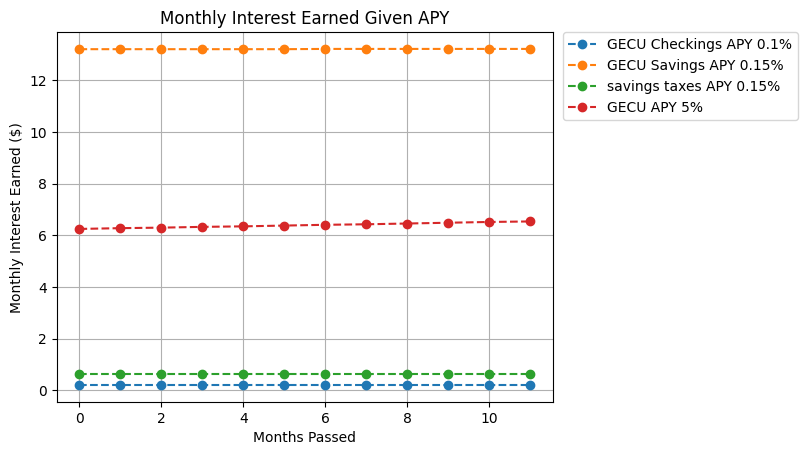

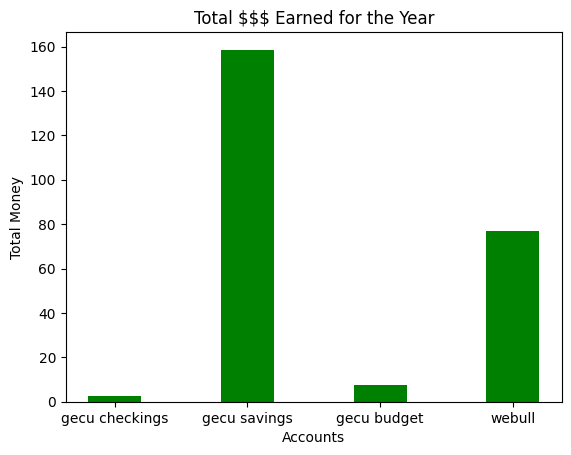

In [6]:
initial_deposit = 100000
monthly_deposit = 0

# cash_savings_df, cash_total = apy_monthly_interest_earned('Cash Savings',apy_rate=0.0,principal=25000,monthly_contributions=monthly_deposit)
GECU_checkings_df, gecu_checkings_total = apy_monthly_interest_earned('GECU Checking Account',apy_rate=0.1,principal=2500,monthly_contributions=monthly_deposit)
GECU_savings_df, gecu_total = apy_monthly_interest_earned('GECU Savings Account',apy_rate=0.15,principal=105645.79,monthly_contributions=monthly_deposit)
GECU_budget_df, gecu_budget_total = apy_monthly_interest_earned('GECU Savings (Year Budget)',apy_rate=0.15,principal=4926.51,monthly_contributions=monthly_deposit)
webull_df, webull_total = apy_monthly_interest_earned('GECU CD',apy_rate=5.0,principal=1500,monthly_contributions=monthly_deposit)

account = ['gecu checkings', 'gecu savings', 'gecu budget','webull']
totals =  [gecu_checkings_total, gecu_total, gecu_budget_total, webull_total]
sum_total = np.sum(np.array(totals))
print('TOTAL AMOUNT FOR EOY ', sum_total)

plt.title('Monthly Interest Earned Given APY')
# plt.plot(np.array(cash_savings_df['InterestEarned']),linestyle='--', marker='o', label="Cash APY 0%")
plt.plot(np.array(GECU_checkings_df['InterestEarned']),linestyle='--', marker='o', label="GECU Checkings APY 0.1%")
plt.plot(np.array(GECU_savings_df['InterestEarned']),linestyle='--', marker='o', label="GECU Savings APY 0.15%")
plt.plot(np.array(GECU_budget_df['InterestEarned']),linestyle='--', marker='o', label="savings taxes APY 0.15%")
plt.plot(np.array(webull_df['InterestEarned']),linestyle='--', marker='o', label="GECU APY 5%")

plt.ylabel('Monthly Interest Earned ($)')
plt.xlabel('Months Passed')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

# creating the bar plot
plt.bar(account, totals, color ='green',
        width = 0.4)
 
plt.xlabel("Accounts")
plt.ylabel("Total Money")
plt.title("Total $$$ Earned for the Year")
plt.show()

